In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
X_RES = 5000
X_MIN = -2
X_MAX = 0.5
Y_RES = 5000
Y_MIN = -1.25
Y_MAX = 1.25

I = 50
T = 2

In [3]:
def make_plot(M, save=False):
    plt.figure(figsize=(16, 16))
    plt.imshow(M, cmap='hot', aspect='equal', extent=[X_MIN, X_MAX, Y_MIN, Y_MAX])

    if save:
        plt.savefig('mandelbrot.png', dpi=600, bbox_inches='tight', pad_inches=0)

### Navie (loops) solution

In [4]:
re = np.linspace(X_MIN, X_MAX, X_RES)
im = np.linspace(Y_MIN, Y_MAX, Y_RES) * 1j

c = re + im[:, np.newaxis]
M = np.zeros((X_RES, Y_RES))

for x in tqdm(range(X_RES)):
    for y in range(Y_RES):
        z = 0 + 0j
        for i in range(I):
            z = z**2 + c[x, y]
            if T <= abs(z):
                M[x, y] = i
                break
        else:
            M[x, y] = I

100%|██████████| 5000/5000 [04:28<00:00, 18.64it/s] 


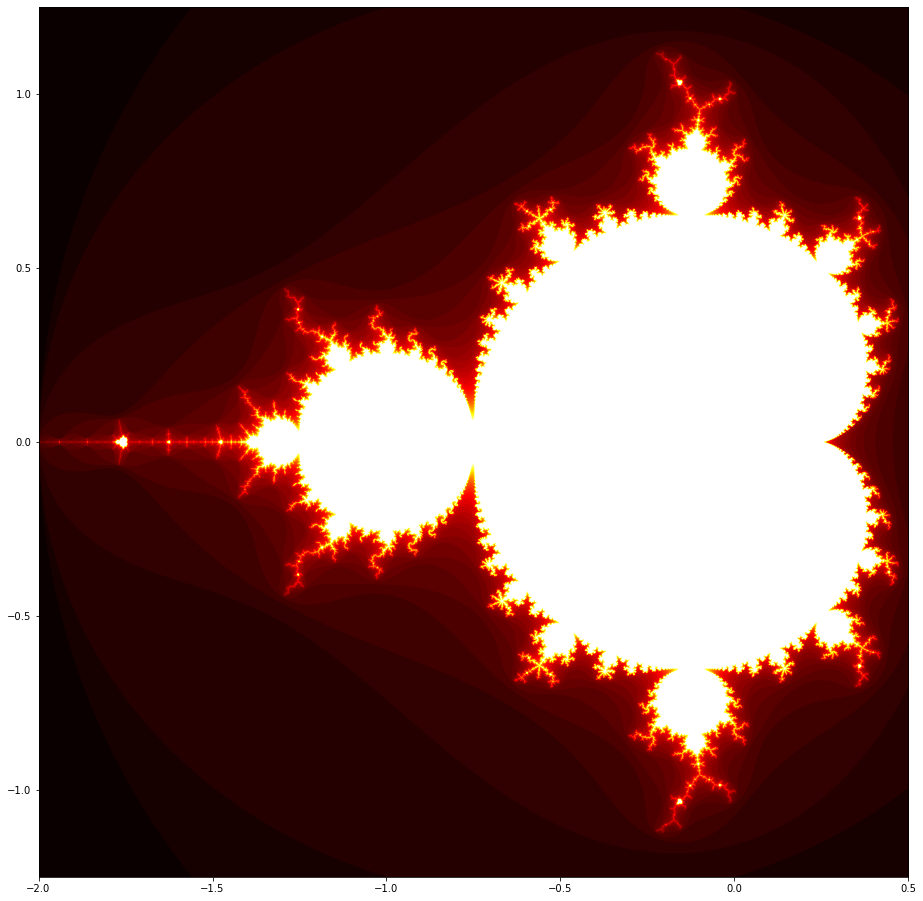

In [5]:
make_plot(M, save=False)

### numpy (vectorized) solution

In [6]:
np.seterr(all='ignore')

re = np.linspace(X_MIN, X_MAX, X_RES)
im = np.linspace(Y_MIN, Y_MAX, Y_RES) * 1j

c = re + im[:, np.newaxis]
M = np.zeros((X_RES, Y_RES))

z = np.zeros((X_RES, Y_RES), dtype=complex)

for i in tqdm(range(I)):
    z = z**2 + c

    mask = T <= abs(z)
    M[mask] = i
    
M[M == 0] = I

100%|██████████| 50/50 [00:13<00:00,  3.60it/s]


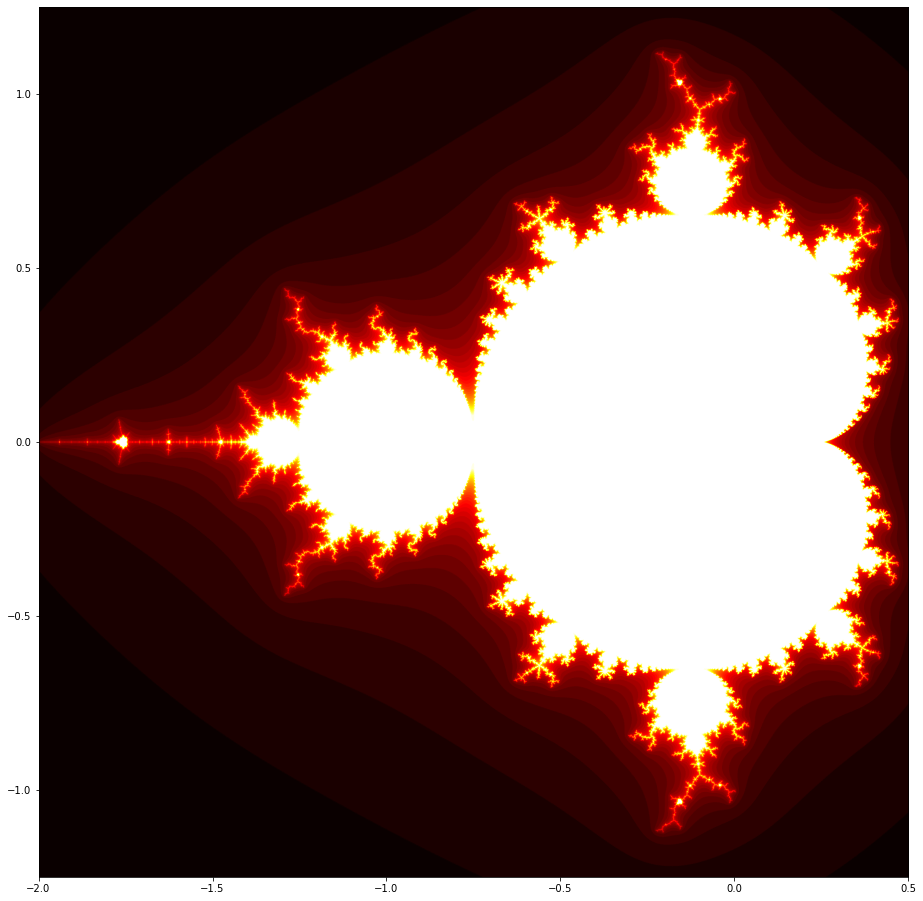

In [7]:
make_plot(M, save=False)